In [3]:
import os
import logging

import subjectVerbObjectExtractUtil as svoExtract
import experimentUtil as expUtil
import mergeGraphUtil as mergeUtil
logging.basicConfig(format='%(asctime)s %(message)s', level=logging.INFO)
logging.getLogger().setLevel(logging.INFO)

In [4]:
INTRO_MD_DIR = "introMDFiles"
CLEAN_INTRO_MD_DIR = "cleanedTexts"
SUBJECT_OBJECT_VERB_CSV = "svo.csv"

In [5]:
#Clean and Extract Text from Intro.md Files

for file in os.listdir(INTRO_MD_DIR):
    input_file_string = open(os.path.join(INTRO_MD_DIR, file)).read()
    proccessedText = svoExtract.extract(input_file_string)
    outputFileName, _ = os.path.splitext(file)
    outputFileName = os.path.join(CLEAN_INTRO_MD_DIR, outputFileName)
    outputFileName += ".txt"
    
    with open(outputFileName, 'w') as filetowrite:
        filetowrite.write(proccessedText)
        filetowrite.close()
        
    logging.info(outputFileName + " file created")

2019-03-22 00:29:07,013 cleanedTexts/semiparametric.txt file created
2019-03-22 00:29:07,018 cleanedTexts/khan.txt file created
2019-03-22 00:29:07,021 cleanedTexts/sis_intro.txt file created
2019-03-22 00:29:07,025 cleanedTexts/seird_stochastic.txt file created
2019-03-22 00:29:07,028 cleanedTexts/karlsson.txt file created
2019-03-22 00:29:07,031 cleanedTexts/ross.txt file created
2019-03-22 00:29:07,034 cleanedTexts/coalescent.txt file created
2019-03-22 00:29:07,038 cleanedTexts/mayanderson.txt file created
2019-03-22 00:29:07,043 cleanedTexts/deleo.txt file created
2019-03-22 00:29:07,049 cleanedTexts/sir_model_intro.txt file created
2019-03-22 00:29:07,058 cleanedTexts/lloydjansen.txt file created
2019-03-22 00:29:07,061 cleanedTexts/erlang.txt file created
2019-03-22 00:29:07,067 cleanedTexts/blackross.txt file created
2019-03-22 00:29:07,075 cleanedTexts/1host1vector.txt file created
2019-03-22 00:29:07,081 cleanedTexts/seir_intro.txt file created


In [6]:
#Extract Subject Verb Object
#Creates subject verb object csv file
svoExtract.extractSVO(CLEAN_INTRO_MD_DIR)

2019-03-22 00:29:09,957 writing 4 tuples
2019-03-22 00:29:09,961 Skipping file .DS_Store
2019-03-22 00:29:10,014 writing 1 tuples
2019-03-22 00:29:10,108 writing 20 tuples
2019-03-22 00:29:10,133 writing 2 tuples
2019-03-22 00:29:10,153 writing 0 tuples
2019-03-22 00:29:10,185 writing 3 tuples
2019-03-22 00:29:10,235 writing 12 tuples
2019-03-22 00:29:10,256 writing 2 tuples
2019-03-22 00:29:10,359 writing 23 tuples
2019-03-22 00:29:10,390 writing 7 tuples
2019-03-22 00:29:10,413 writing 1 tuples
2019-03-22 00:29:10,438 writing 7 tuples
2019-03-22 00:29:10,520 writing 5 tuples
2019-03-22 00:29:10,747 writing 22 tuples
2019-03-22 00:29:10,764 writing 3 tuples
2019-03-22 00:29:10,765 File svo.csv created


In [7]:
# Creates CSV of UMAP and DBSCAN Clusters and InSample Vs OutSample Similarities
# Outputs clusteringLabels.csv

#expUtil.createCluster(SUBJECT_OBJECT_VERB_CSV)

In [8]:
# Get Kmeans Experiment Accuracy
# Assigns Cluster Labels to Variable Inputs to KMeansPredicted.csv and computes accuracy by taking the difference
# with the ground truth labels in JuliaDataVariable.csv
expUtil.runKMeansExp()

2019-03-22 00:29:57,895 generating CSV ExperimentData/KmeansCluster.csv
2019-03-22 00:29:57,899 generating CSV ExperimentData/KmeansPredicted.csv
2019-03-22 00:29:57,906 KMeans Accuracy is : 0.2222222222222222


In [13]:
# Uses cluster that is most "similar" to the variable for cluster assignment
expUtil.runUMapSimilarityExp()

2019-03-22 00:30:48,842 generating CSV ExperimentData/KmeansCluster.csv
2019-03-22 00:31:17,731 generating CSV ExperimentData/KmeansPredicted.csv


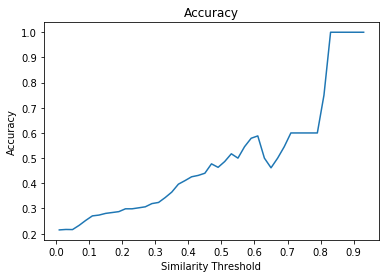

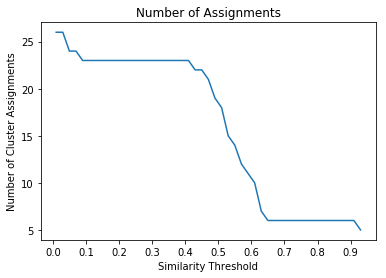

In [10]:
# Uses KMeans for cluster assignment, computes the similarity of the assignment with nodes
# that also belong to the cluster assignment 
averageSimArray = expUtil.runCombinationExp()

In [11]:
#Creates Final CSV to create metaGraph

#Minimum threshold to merge 2 nodes from extracted subject verb objects
ClusterThreshold = .85

#Minimum threshold to assign variable to a cluster
VariableThreshold = .5

mergeUtil.createFinalGraph(ClusterThreshold, VariableThreshold, averageSimArray)